In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import numpy as np

C:\Users\p\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Dense(2,input_shape=(2,)))
model.add(Dense(4))
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.summary()

model.predict(np.array([[1.,2.]]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


array([[0.470563  , 0.6424935 , 0.48684376]], dtype=float32)

In [88]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.utils import np_utils
from keras.optimizers import Adam
import numpy as np

In [89]:
xy = np.loadtxt('zoo.csv',delimiter=',',dtype=np.float32)
x= xy[:,0:-1]
y=xy[:,[-1]]

In [90]:
x

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]], dtype=float32)

In [91]:
y

array([[0.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [3.],
       [0.],
       [0.],
       [1.],
       [3.],
       [6.],
       [6.],
       [6.],
       [1.],
       [0.],
       [3.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [5.],
       [4.],
       [4.],
       [0.],
       [0.],
       [0.],
       [5.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [1.],
       [3.],
       [5.],
       [5.],
       [1.],
       [5.],
       [1.],
       [0.],
       [0.],
       [6.],
       [0.],
       [0.],
       [0.],
       [0.],
       [5.],
       [4.],
       [6.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [6.],
       [3.],
       [0.],
       [0.],
       [2.],

In [12]:
nb_classes = int(y.max()+1)
y_one_hot = np_utils.to_categorical(y,nb_classes)
x_train,x_test,y_train,y_test = train_test_split(x,y_one_hot,test_size=0.3,random_state=42)

In [14]:
y_one_hot

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
 

In [18]:
model = Sequential()
model.add(Dense(12,input_dim=len(x[0])))
model.add(Dense(10))
model.add(Dense(nb_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)
# 실제 데이터에 넣어서 돌리기 때문에 acc와 loss 값이 다르다.
print('\ntest: \n',model.evaluate(x_test,y_test))

Epoch 1/100
70/70 [==============================] - 0s 4ms/step - loss: 2.2944 - acc: 0.0714
Epoch 2/100
70/70 [==============================] - 0s 71us/step - loss: 1.6269 - acc: 0.4143
Epoch 3/100
70/70 [==============================] - 0s 100us/step - loss: 1.2831 - acc: 0.6143
Epoch 4/100
70/70 [==============================] - 0s 100us/step - loss: 1.0581 - acc: 0.7143
Epoch 5/100
70/70 [==============================] - 0s 71us/step - loss: 0.9097 - acc: 0.7429
Epoch 6/100
70/70 [==============================] - 0s 100us/step - loss: 0.7872 - acc: 0.7571
Epoch 7/100
70/70 [==============================] - 0s 86us/step - loss: 0.6826 - acc: 0.8000
Epoch 8/100
70/70 [==============================] - 0s 114us/step - loss: 0.5949 - acc: 0.8143
Epoch 9/100
70/70 [==============================] - 0s 114us/step - loss: 0.5250 - acc: 0.8143
Epoch 10/100
70/70 [==============================] - 0s 114us/step - loss: 0.4640 - acc: 0.8286
Epoch 11/100
70/70 [========================

# Keras example

In [19]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam,RMSprop
import matplotlib.pyplot as plt

In [20]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS =32

In [21]:
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = Adam()

In [22]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
print('x_train shape: ',x_train.shape)
print(x_train.shape[0],'train_samples')
print(x_test.shape[0],'test_samples')


170500096/170498071 [==============================] - 2022s 12us/step
x_train shape:  (50000, 32, 32, 3)
50000 train_samples
10000 test_samples


In [23]:
y_train = np_utils.to_categorical(y_train,NB_CLASSES)
y_test = np_utils.to_categorical(y_test,NB_CLASSES)

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /=255

In [86]:
model= Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('selu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('selu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('selu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('selu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# model.add(Conv2D(16,(3,3),padding='same',input_shape=(16,16,32)))
# model.add(Activation('selu'))       
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('selu'))
model.add(Dense(128))
model.add(Activation('selu'))
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_60 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
activation_61 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 32)          0         
__________

In [87]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 106s 3ms/step - loss: 2.0396 - acc: 0.2557 - val_loss: 1.7718 - val_acc: 0.3318
Epoch 2/20
40000/40000 [==============================] - 103s 3ms/step - loss: 1.8011 - acc: 0.3359 - val_loss: 1.5321 - val_acc: 0.4404
Epoch 3/20
40000/40000 [==============================] - 104s 3ms/step - loss: 1.6820 - acc: 0.3828 - val_loss: 1.5437 - val_acc: 0.4299
Epoch 4/20
40000/40000 [==============================] - 104s 3ms/step - loss: 1.6078 - acc: 0.4096 - val_loss: 1.3889 - val_acc: 0.4925
Epoch 5/20
40000/40000 [==============================] - 104s 3ms/step - loss: 1.5560 - acc: 0.4341 - val_loss: 1.6876 - val_acc: 0.4172
Epoch 6/20
40000/40000 [==============================] - 104s 3ms/step - loss: 1.5100 - acc: 0.4514 - val_loss: 1.3405 - val_acc: 0.5186
Epoch 7/20
40000/40000 [==============================] - 104s 3ms/step - loss: 1.4715 - acc: 0.4718 - val_loss: 1.3848 - 

KeyboardInterrupt: 

In [82]:
print('Testing')
score = model.evaluate(x_test,y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)
print('\nTest score: ',score[0])
print('\Test accuracy',score[1])

model_json = model.to_json()
open('cifar10_architecture_adan.lyaer_512_3__selu.json','w').write(model_json)
model.save_weights('cifar10_architecture_adan.lyaer_512_3__selu.json.h5',overwrite=True)

Testing
10000/10000 [==============================] - 7s 720us/step

Test score:  1.2439868705749513
\Test accuracy 0.6137


In [ ]:
print(history.history.keys())
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

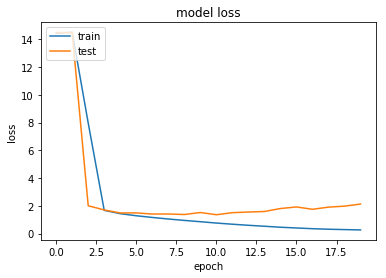

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()